In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv("auto-mpg.csv")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
#the odd value is in the horsepower column
cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
# we can see that the odd value is '?' representing null
# so we now change it to NaN value and fill the spot with the mean horsepower
cars.horsepower = cars.horsepower.str.replace('?','NaN').astype(float)
cars.horsepower.fillna(cars.horsepower.mean(),inplace=True)
cars.horsepower = cars.horsepower.astype(int)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


In [7]:
#car name not needed
cars = cars.drop('car name',axis=1)

# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(cars.duplicated().sum()))
print('sum of null values: {}'.format(cars.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [8]:
#summary statistics
display(cars.describe())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


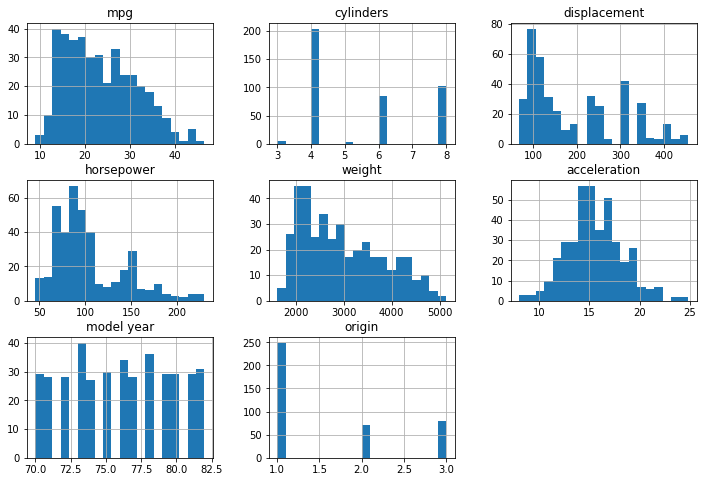

In [9]:
#visualizing the columns
cars.hist(figsize=(12,8),bins=20)
plt.show()

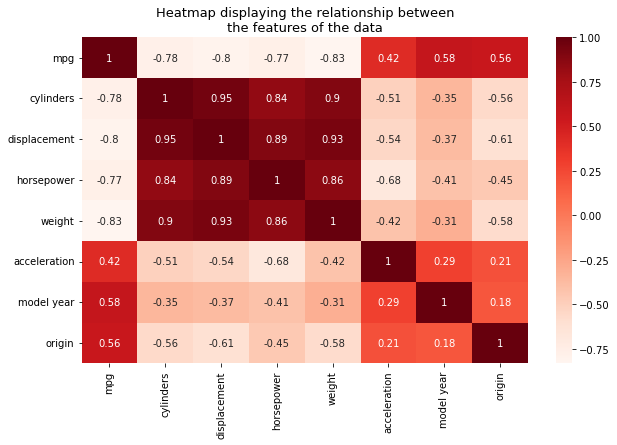

In [10]:
#visualizing the relationship between mpg and other columns using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [11]:
#checking for multicollinearity
X1 = sm.tools.add_constant(cars) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

series1

const           780.811358
mpg               5.583594
cylinders        10.742336
displacement     22.159830
horsepower        9.056781
weight           13.468785
acceleration      2.515908
model year        1.954947
origin            1.853326
dtype: float64

In [12]:
#dropping columns that highly corelate with eachother
newcars = cars.drop(['cylinders','displacement','weight'],axis=1)

#checking of multicollinearity again
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

series2

const           715.683761
mpg               3.982206
horsepower        4.131289
acceleration      2.029527
model year        1.607080
origin            1.542532
dtype: float64

# Training the regression model

In [13]:
X = newcars.drop('mpg',axis=1)

y = newcars.mpg  

#scaling feature variables
X_scaled = preprocessing.scale(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

#splitting data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [14]:
#making prediction
linear_pred = model.predict(X_test)
#score the train & test model
print('Train score: {}\n'.format(model.score(X_train,y_train)))
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7553135661809439

Test score: 0.7271939488775567

Overall model accuracy: 0.7271939488775567

Mean Squared Error: 17.432820262005098


In [16]:
#trying a ridge regression model to get higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train) 

ridge_pred = ridge.predict(X_test)

print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7553135647960987

Test score: 0.7271921092249627

Overall model accuracy: 0.7271921092249627

Mean Squared Error: 17.43293781926925


In [17]:
#using grid search to find the best parameters of the ridge model
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [18]:
# print out the best parameter for ridge and score it on the test and train data
print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.7553000451656908

Test score: 0.726999466880118


In [19]:
#lasso model for regression
lasso = Lasso()

param['max_iter'] = [1000,10000,100000,1000000]
#initialize the grid
lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) 

lasso_search.fit(X_train,y_train) 

# print out the best parameters and score it 
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0, 'max_iter': 1000}

Train score: 0.7553135661809438

Test score: 0.7271939488775567


In [20]:
#splitting the original x and y data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)


dtree = DecisionTreeRegressor()

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]} 

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)

tree_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [21]:
tree_pred = tree_search.predict(xtest)

print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}

Train score: 0.8466542751653117

Test score: 0.8254090941283914

Overall model accuracy: 0.8254090941283914

Mean Squared Error: 11.46813896012866


In [22]:
#using randomforestregressor to perform grid search and find the best parameters
forest = RandomForestRegressor()

params['n_estimators'] = [100,200,300,400,500]

forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)

forest_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [23]:
forest_pred = forest_search.predict(xtest)

print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))

Best parameter found:
{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 7}

Train score: 0.8954542133436436

Test score: 0.85098772027806

Overall model accuracy: 0.85098772027806

Mean Squared Error: 9.78798707805241


In [24]:
#training a gradientboostingRegressor model
gradient_model = GradientBoostingRegressor() 
# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]
gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,n_iter=50)
gradient_search.fit(xtrain,ytrain) 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [26]:
gradient_pred = gradient_search.predict(xtest)

print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('Looks like this model is not too overfitted and it has low mean squared error \
so we use this one........')


Best parameter found:
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.05}

Train score: 0.8942445154105695

Test score: 0.8756124952884851

Overall model accuracy: 0.8756124952884851

Mean Squared Error: 8.170489647292008

Looks like this model is not too overfitted and it has low mean squared error so we use this one........


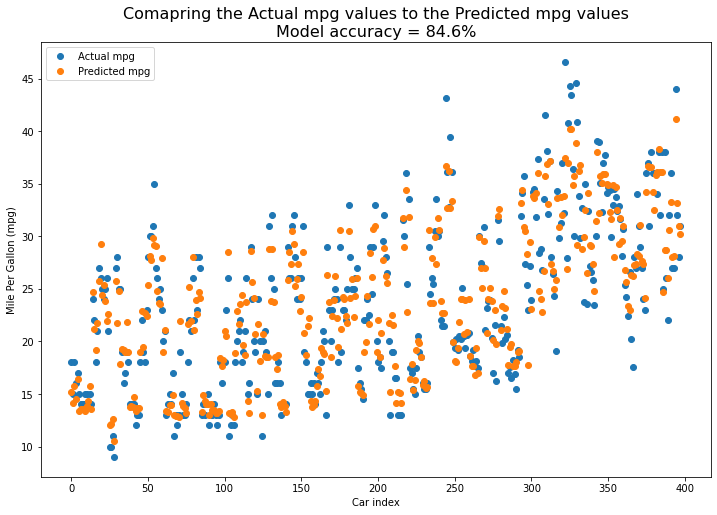

In [27]:
#make predictions with our model
#creating a new dataframe of the feature variables
newcars_new = newcars.drop('mpg',axis=1)

# making a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':newcars.mpg.values,
                    'Predicted mpg':gradient_search.predict(newcars_new.values)})

#drawing a scatterplot
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 84.6%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()